# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Rizki Ilhamnuddin Muria
- **Email:** rizkiilhammuria@gmail.com / mc009d5y1602@student.devacademy.id
- **ID Dicoding:**MC009D5Y1602

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 = Kondisi cuaca seperti apa yang memiliki permintaan sewa sepeda tertinggi?
*   Pertanyaan 2 =  Bagaimana perbandingan antara jumlah penyewaan sepeda pada musim semi, musim panas, musim gugur, dan musim dingin?
- Pertanyaan 3 = Pada jam berapa penyewaan sepeda mencapai jumlah tertinggi dalam peminjamannya?


## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [3]:
df_day = pd.read_csv("day.csv")
df_hour = pd.read_csv("hour.csv")


In [4]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Disini kita bisa melihat isi dari dua dataset yaitu dataset hour.csv yang kita definisikan menjadi df_hour, lalu juga dataset day.csv menjadi df_day
- Kita bisa lihat terdapat beberapa column di setiap datasetnya yaitu sepert instant, dteday, season, yr, month, holiday, weekday, workigday, wathersit, temp, atemp, hum, wiondspeed, casual, registered, dan cnt untuk dibagian dataset day.csv. sedangkan didataset hour.csv sama seperti day.csv namun terdapat tambahan 1 column yaitu hr.

### Assessing Data

In [6]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


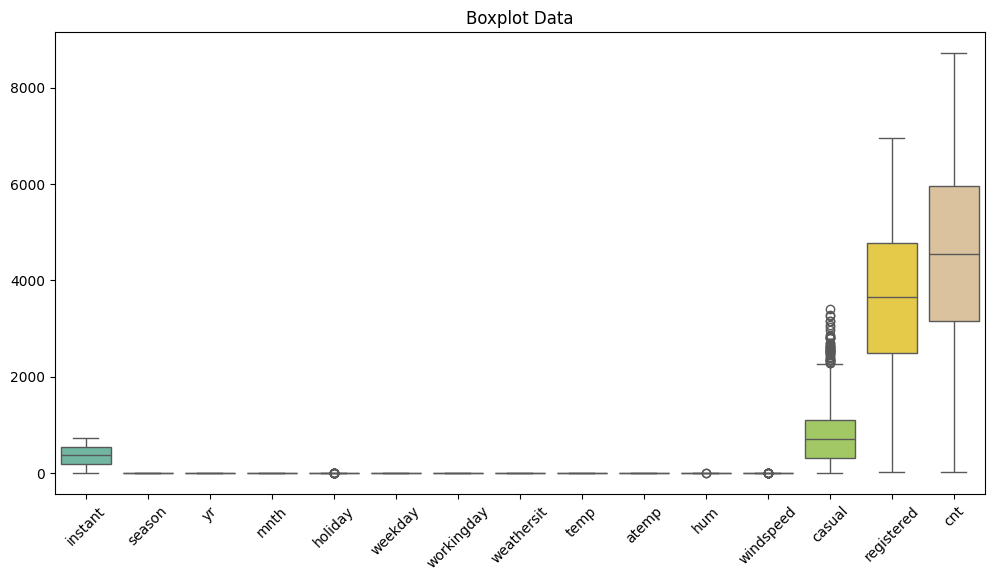

In [8]:
plt.figure(figsize=(12, 6))  # Atur ukuran lebih besar
sns.boxplot(data=df_day, palette="Set2")  # Warna lebih menarik
plt.xticks(rotation=45)  # Memiringkan label jika terlalu panjang
plt.title("Boxplot Data")  # Judul plot
plt.show()

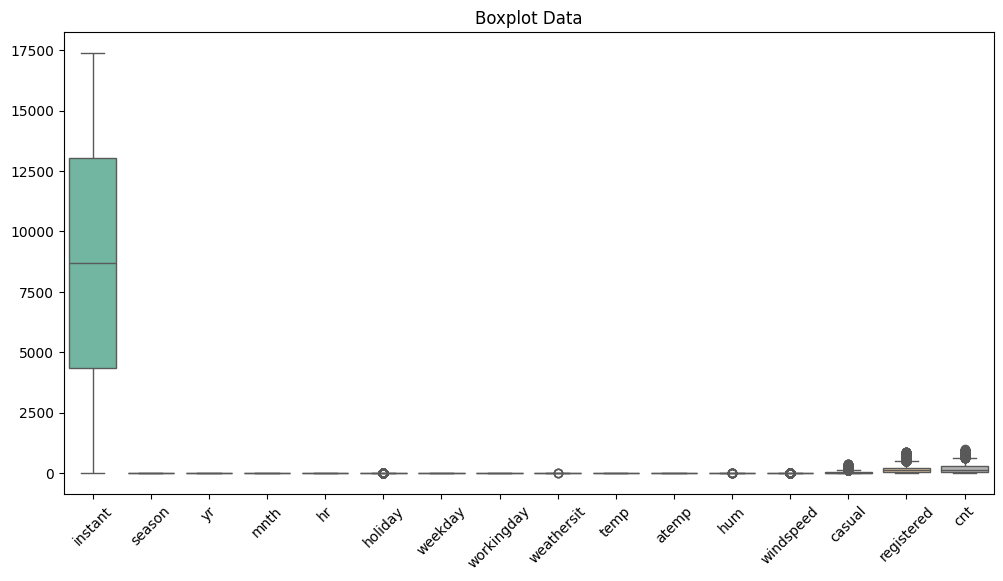

In [9]:
plt.figure(figsize=(12, 6))  # Atur ukuran lebih besar
sns.boxplot(data=df_hour, palette="Set2")  # Warna lebih menarik
plt.xticks(rotation=45)  # Memiringkan label jika terlalu panjang
plt.title("Boxplot Data")  # Judul plot
plt.show()

In [10]:
df_day.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [11]:
df_hour.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [12]:
df_day.duplicated().sum()

0

In [13]:
df_hour.duplicated().sum()

0

In [14]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [15]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dari kedua dataset diatas bisa dilihat bahwa memiliki 3 tipe data yaitu float64(4), int64(11), object(1) untuk dibagian day.csv dan float64(4), int64(12), object(1) untuk didataset hour.csv. Namun terdapat kesalahan tipe data pafa bagian dteday yaitu tipenya object yang seharusnya memiliki tepe data datetime.
- Dikedua dataset tersebut tidak terdapat missing value dan juga duplicate data.
- Dan juga tidak terdapat outlier pada kedua dataset tersebut karena memiliki nilai yang sudah sesuai tanpa adanya nilai yang tidak masuk akal.

### Cleaning Data

In [16]:
df_day.drop(columns=['instant'], inplace=True)


In [17]:
df_hour.drop(columns=['instant'], inplace=True)


In [18]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
print(df_day.dtypes)

dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [19]:
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])
print(df_day.dtypes)

dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [20]:
column_rename = {
    "yr": "year",
    "mnth": "month",
    "dteday": "date",
    "hum": "humidity"
}
df_day.rename(columns=column_rename, inplace=True)
df_hour.rename(columns=column_rename, inplace=True)

mappings = {
    "weekday": {
        0: "Senin", 1: "Selasa", 2: "Rabu", 3: "Kamis",
        4: "Jumat", 5: "Sabtu", 6: "Minggu"
    },
    "weathersit": {
        1: "Clear", 2: "Mist + Cloudy",
        3: "Light Snow / Light Rain", 4: "Heavy Rain"
    },
    "season": {
        1: "springer", 2: "summer", 3: "fall", 4: "winter"
    },
    "year": {0: "2011", 1: "2012"},
    "workingday": {0: "Libur", 1: "Kerja"}
}

df_day.replace(mappings, inplace=True)
df_hour.replace( mappings, inplace=True)


print(df_day.head())
print(df_hour.head())


        date    season  year  month  holiday weekday workingday  \
0 2011-01-01  springer  2011      1        0  Minggu      Libur   
1 2011-01-02  springer  2011      1        0   Senin      Libur   
2 2011-01-03  springer  2011      1        0  Selasa      Kerja   
3 2011-01-04  springer  2011      1        0    Rabu      Kerja   
4 2011-01-05  springer  2011      1        0   Kamis      Kerja   

      weathersit      temp     atemp  humidity  windspeed  casual  registered  \
0  Mist + Cloudy  0.344167  0.363625  0.805833   0.160446     331         654   
1  Mist + Cloudy  0.363478  0.353739  0.696087   0.248539     131         670   
2          Clear  0.196364  0.189405  0.437273   0.248309     120        1229   
3          Clear  0.200000  0.212122  0.590435   0.160296     108        1454   
4          Clear  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
        date    season  year  month  hr  holiday w

In [21]:
df_day["weekday"] = df_day["weekday"].astype("category")
df_day["season"] = df_day["season"].astype("category")
df_day["weathersit"] = df_day["weathersit"].astype("category")
df_day["workingday"] = df_day["workingday"].astype("category")
df_day["year"] = df_day["year"].astype("category")
print(df_day.dtypes)

date          datetime64[ns]
season              category
year                category
month                  int64
holiday                int64
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
humidity             float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [22]:
df_hour["weekday"] = df_hour["weekday"].astype("category")
df_hour["season"] = df_hour["season"].astype("category")
df_hour["weathersit"] = df_hour["weathersit"].astype("category")
df_hour["workingday"] = df_hour["workingday"].astype("category")
df_hour["year"] = df_hour["year"].astype("category")
print(df_hour.dtypes)

date          datetime64[ns]
season              category
year                category
month                  int64
hr                     int64
holiday                int64
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
humidity             float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [23]:
# Mengembalikan temp dan atemp ke Celsius di dataset
df_hour["temp"] = df_hour["temp"] * (39 - (-8)) + (-8)
df_hour["atemp"] = df_hour["atemp"] * (50 - (-16)) + (-16)

df_day["temp"] = df_day["temp"] * (39 - (-8)) + (-8)
df_day["atemp"] = df_day["atemp"] * (50 - (-16)) + (-16)

In [24]:
df_day.head()

,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,2011-01-01,springer,2011,1,0,Minggu,Libur,Mist + Cloudy,8.175849,7.999250,0.805833,0.160446,331,654,985
1,2011-01-02,springer,2011,1,0,Senin,Libur,Mist + Cloudy,9.083466,7.346774,0.696087,0.248539,131,670,801
2,2011-01-03,springer,2011,1,0,Selasa,Kerja,Clear,1.229108,-3.499270,0.437273,0.248309,120,1229,1349
3,2011-01-04,springer,2011,1,0,Rabu,Kerja,Clear,1.400000,-1.999948,0.590435,0.160296,108,1454,1562
4,2011-01-05,springer,2011,1,0,Kamis,Kerja,Clear,2.666979,-0.868180,0.436957,0.186900,82,1518,1600


In [25]:
df_hour.head()

,date,season,year,month,hr,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,2011-01-01,springer,2011,1,0,0,Minggu,Libur,Clear,3.28,3.0014,0.81,0.0,3,13,16
1,2011-01-01,springer,2011,1,1,0,Minggu,Libur,Clear,2.34,1.9982,0.80,0.0,8,32,40
2,2011-01-01,springer,2011,1,2,0,Minggu,Libur,Clear,2.34,1.9982,0.80,0.0,5,27,32
3,2011-01-01,springer,2011,1,3,0,Minggu,Libur,Clear,3.28,3.0014,0.75,0.0,3,10,13
4,2011-01-01,springer,2011,1,4,0,Minggu,Libur,Clear,3.28,3.0014,0.75,0.0,0,1,1


In [26]:
df_day.describe()

,date,month,holiday,temp,atemp,humidity,windspeed,casual,registered,cnt
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,6.519836,0.028728,15.283085,15.307363,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,1.000000,0.000000,-5.220871,-10.781406,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,4.000000,0.000000,7.842925,6.297605,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,7.000000,0.000000,15.421651,16.124378,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,10.000000,0.000000,22.804575,24.167732,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,12.000000,1.000000,32.498349,39.499136,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,NaN,3.451913,0.167155,8.603397,10.755438,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [27]:
df_hour.describe()

,date,month,hr,holiday,temp,atemp,humidity,windspeed,casual,registered,cnt
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,6.537775,11.546752,0.028770,15.358397,15.401157,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,-7.060000,-16.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,4.000000,6.000000,0.000000,7.980000,5.997800,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,7.000000,12.000000,0.000000,15.500000,15.996800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,10.000000,18.000000,0.000000,23.020000,24.999200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,12.000000,23.000000,1.000000,39.000000,50.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,NaN,3.438776,6.914405,0.167165,9.050138,11.342114,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight:**
- Dibagian cleaning melakukan penghapusan pada column instant karena hanya berisi nilai indexing saja dan tidak mempengaruhi data tersebut.
- Melakukan perubahan tipe data pada bagian dteday yang awalnya object menjadi tipe data datetime.
- Disini melakukan banyak perubahan tipe data pada collumn season, weekday, weathersit, dan workingday menjadi tipe data category. Karena ingin menghemat memory dibanding mengubahnya menjadi tipe data object
- Disini melakukan perubahan pada nilai dari beberapa colum yaitu season, weekday, weathersit dan workingday.

  - Yang nilai di season itu 1,2,3,4 dirubah menjadi nama musim itu sendiri (springer, summer, fall, dan winter)

  - pada bagian weekday nilai diubah dari 0-6 diganti menjadi nama hari yaitu senin - minggu.

  - Pada data weathersit kita ganti menjadi 1: "Clear", 2: "Mist + Cloudy", 3: "Light Snow / Light Rain", 4: "Heavy Rain"

  - Dibagian year mengubah nilai awalnya itu 0 dan 1 menjadi 0 untuk 2011 dan 1 untuk 2012

  - Pada workingday mengubah 0 menjadi "Libur" dan 1 menjadi "kerja"
- Mengembalikan nilaiu dari temp dan atemp dari kedua dataset menjadi nilai asli atau nilai awal dari nilai temp dan atemp itu sendiri.


## Exploratory Data Analysis (EDA)

### Explore ...

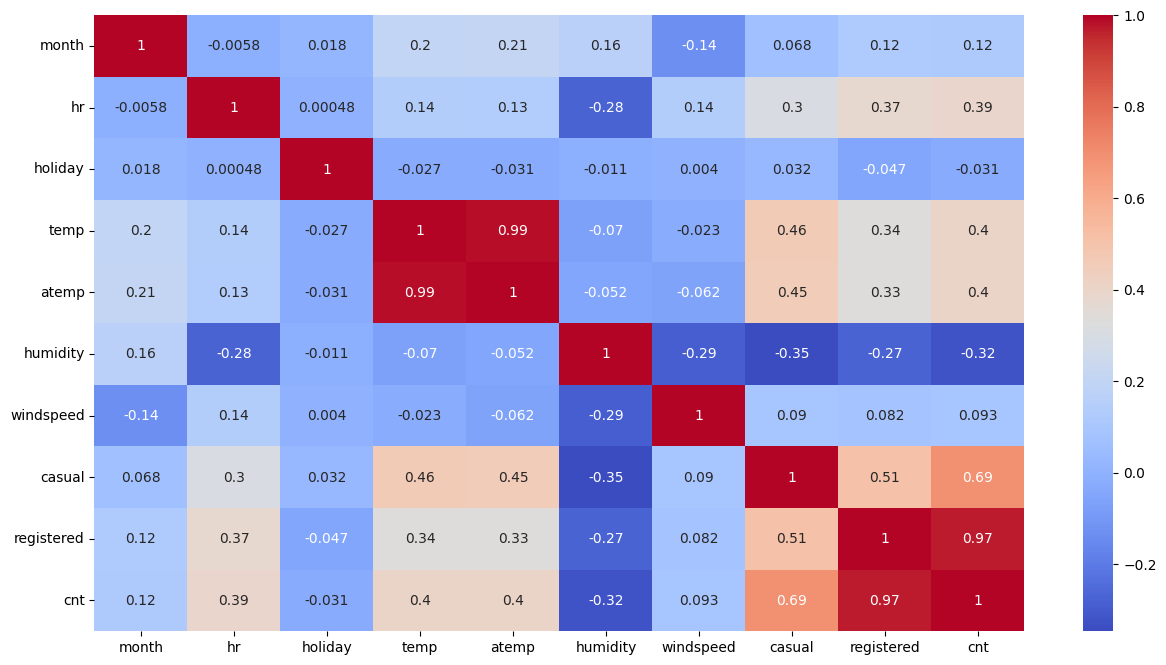

In [28]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_hour.select_dtypes(include=[float, int]).corr(), annot=True, cmap="coolwarm")
plt.show()


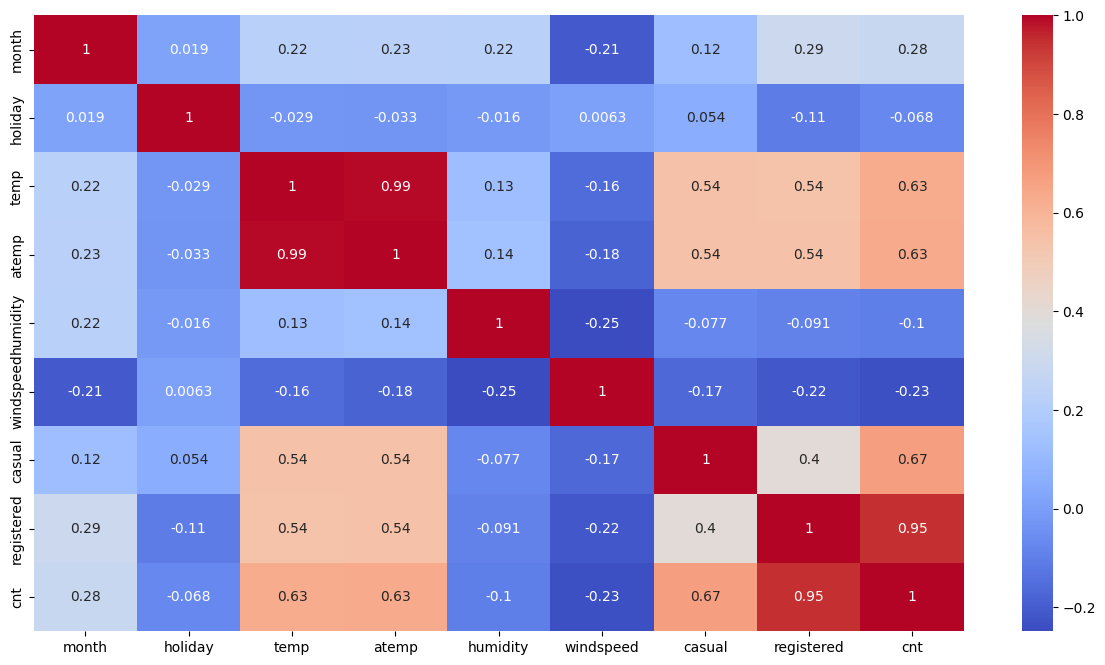

In [29]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_day.select_dtypes(include=[float, int]).corr(), annot=True, cmap="coolwarm")
plt.show()


In [30]:
top_hour = df_hour.groupby("hr")["cnt"].sum().idxmax()
max_rent = df_hour.groupby("hr")["cnt"].sum().max()

print(f"Jumlah penyewa terbanyak terjadi pada pukul {top_hour}:00 dengan total {max_rent} penyewa.")


Jumlah penyewa terbanyak terjadi pada pukul 17:00 dengan total 336860 penyewa.


In [31]:
top_hour_weather = df_hour.groupby(["weathersit", "hr"], observed=True)["cnt"].sum().reset_index()

top_hour_weather = top_hour_weather.loc[top_hour_weather.groupby("weathersit", observed=True)["cnt"].idxmax()]

top_hour_weather = top_hour_weather.rename(columns={
    "weathersit": "Kondisi Cuaca",
    "hr": "Jam Tersibuk",
    "cnt": "Total Penyewa"
})

print(top_hour_weather)


              Kondisi Cuaca  Jam Tersibuk  Total Penyewa
17                    Clear            17         253718
26               Heavy Rain            18            164
44  Light Snow / Light Rain            17          20975
59            Mist + Cloudy             8          89604


In [32]:
# Menampilkan jumlah penyewa berdasarkan kondisi cuaca dan hari
tabel_cuaca = df_hour.groupby(["weathersit", "weekday"], observed=False)["cnt"].sum().unstack()

# Menampilkan tabel
print(tabel_cuaca)


weekday                   Jumat   Kamis  Minggu    Rabu   Sabtu  Selasa  \
weathersit                                                                
Clear                    354840  328260  347681  326981  333321  303497   
Heavy Rain                    0      36      23       0       0     164   
Light Snow / Light Rain   18468   31620   19290   27817   21500   19959   
Mist + Cloudy            112087  113132  110813  114311  132969  131883   

weekday                   Senin  
weathersit                       
Clear                    343593  
Heavy Rain                    0  
Light Snow / Light Rain   19677  
Mist + Cloudy             80757  


In [33]:
tabel_total_cuaca = df_hour.groupby("weathersit", observed=False)["cnt"].sum()

print(tabel_total_cuaca)


weathersit
Clear                      2338173
Heavy Rain                     223
Light Snow / Light Rain     158331
Mist + Cloudy               795952
Name: cnt, dtype: int64


In [34]:
daily_rentals = df_day.groupby("weekday", observed=True)["cnt"].sum().reset_index()

daily_rentals.columns = ["Hari", "Total Penyewa"]

print(daily_rentals)


     Hari  Total Penyewa
0   Jumat         485395
1   Kamis         473048
2  Minggu         477807
3    Rabu         469109
4   Sabtu         487790
5  Selasa         455503
6   Senin         444027


In [45]:
df_season_total = df_hour.groupby("season", observed=True)["cnt"].sum().reset_index()
df_season_total["season"] = pd.Categorical(
    df_season_total["season"], categories=["springer", "summer", "fall", "winter"], ordered=True
)
print(df_season_total)


     season      cnt
0      fall  1061129
1  springer   471348
2    summer   918589
3    winter   841613


In [47]:
df_season_weather = df_hour.groupby(["season", "weathersit"], observed=True)["cnt"].mean().reset_index()
df_season_weather["season"] = pd.Categorical(
    df_season_weather["season"], categories=["springer", "summer", "fall", "winter"], ordered=True
)
print(df_season_weather)


      season               weathersit         cnt
0       fall                    Clear  244.494207
1       fall  Light Snow / Light Rain  171.955390
2       fall            Mist + Cloudy  224.848997
3   springer                    Clear  122.055535
4   springer               Heavy Rain   74.333333
5   springer  Light Snow / Light Rain   58.650407
6   springer            Mist + Cloudy  103.074689
7     summer                    Clear  232.410983
8     summer  Light Snow / Light Rain  115.179803
9     summer            Mist + Cloudy  181.261364
10    winter                    Clear  209.463779
11    winter  Light Snow / Light Rain  116.453333
12    winter            Mist + Cloudy  201.483974


**Insight:**
- Dari heatmap diatas kita bisa melihat ada korelasi negatif di antara windspeed dengan cnt yang dimana suhu sangat mempengaruhi jumlah penyewa
- Dari heatmap juga bisa melihat bahwa ada korelasi antara jam atau hr dengan pola penyewaan berdasarkan jam tertentu tersebut.
- Bisa dilihat juga bahwa data diatas ini terdapat dijam terbanyak atau tersibuk itu di jam 17 yang dimana dengan cuacanya tersebut ialah clear atau cerah
- Data diatas kita lihat bahwa cuaca begitu berpengaruh dengan dengan nilai atau jumlah penyewan yang dimana cuaca cerah memiliki jumlah penyewa terbanyak yaitu 2.338.273 dan yang terendah adalah heavy rain dengan penyewa 223
- data diatas juga bahwa pada tiap harinya tidak ada jumlah yang penyewaan yang jauh signifikan berbeda dari hari lainnya, dnegan hari total penyewa terbanyak itu 485.395 dengan jumlah penyewa terendah itu pada hari senin dengan 444.027
- Data diatas menunjukkan bahwa musim mempengaruhi jumlah penyewa dengan fall sekitar 1.061.129 sebagai musim dnegan penyewa tertinggi sedangkan springer memiliki penyewa terendah dengan 471.348 penyewa.

## Visualization & Explanatory Analysis

### Pertanyaan 1:Kondisi cuaca seperti apa yang memiliki permintaan sewa sepeda tertinggi?


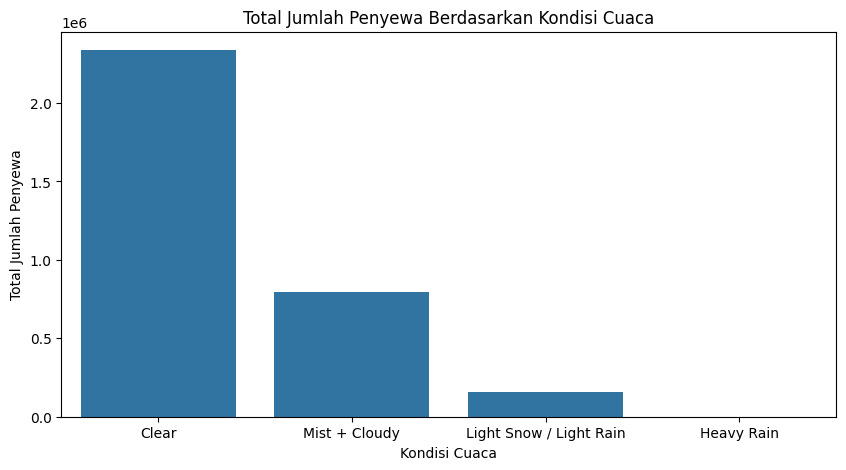

In [36]:
urutan_cuaca = ["Clear", "Mist + Cloudy", "Light Snow / Light Rain", "Heavy Rain"]

df_total = df_hour.groupby("weathersit", observed=True)["cnt"].sum().reset_index()

df_total["weathersit"] = pd.Categorical(df_total["weathersit"], categories=urutan_cuaca, ordered=True)

plt.figure(figsize=(10, 5))
sns.barplot(x="weathersit", y="cnt", data=df_total, order=urutan_cuaca, errorbar=None)

plt.title("Total Jumlah Penyewa Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Total Jumlah Penyewa")

plt.show()


### Pertanyaan 2: Bagaimana perbandingan antara jumlah penyewaan sepeda pada musim semi, musim panas, musim gugur, dan musim dingin?



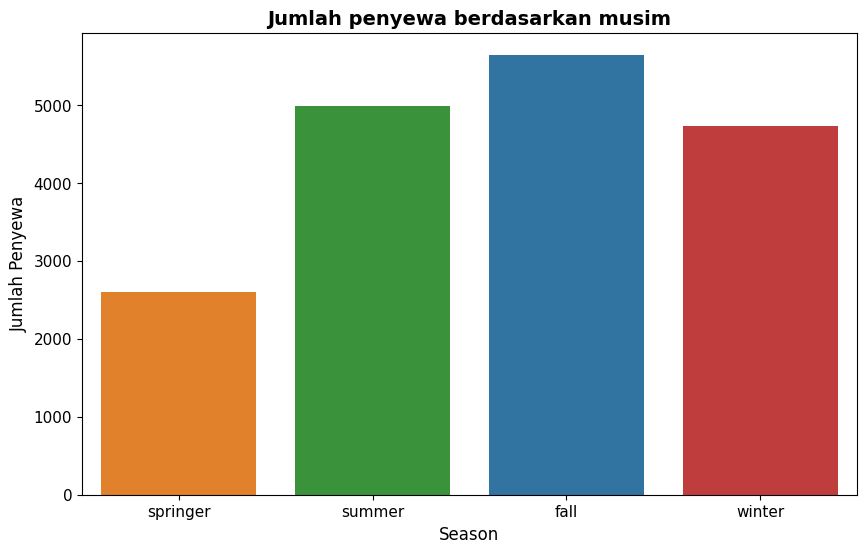

In [37]:
plt.figure(figsize=(10, 6))

sns.barplot(
    x="season",
    y="cnt",
    data=df_day,
    order=["springer", "summer", "fall", "winter"],
    hue="season",
    legend=False,
    errorbar=None
)

plt.title("Jumlah penyewa berdasarkan musim", fontsize=14, fontweight="bold")
plt.xlabel("Season", fontsize=12)
plt.ylabel("Jumlah Penyewa", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.show()


### Pertanyaan 3 : Pada jam berapa penyewaan sepeda mencapai jumlah tertinggi dalam peminjamannya?



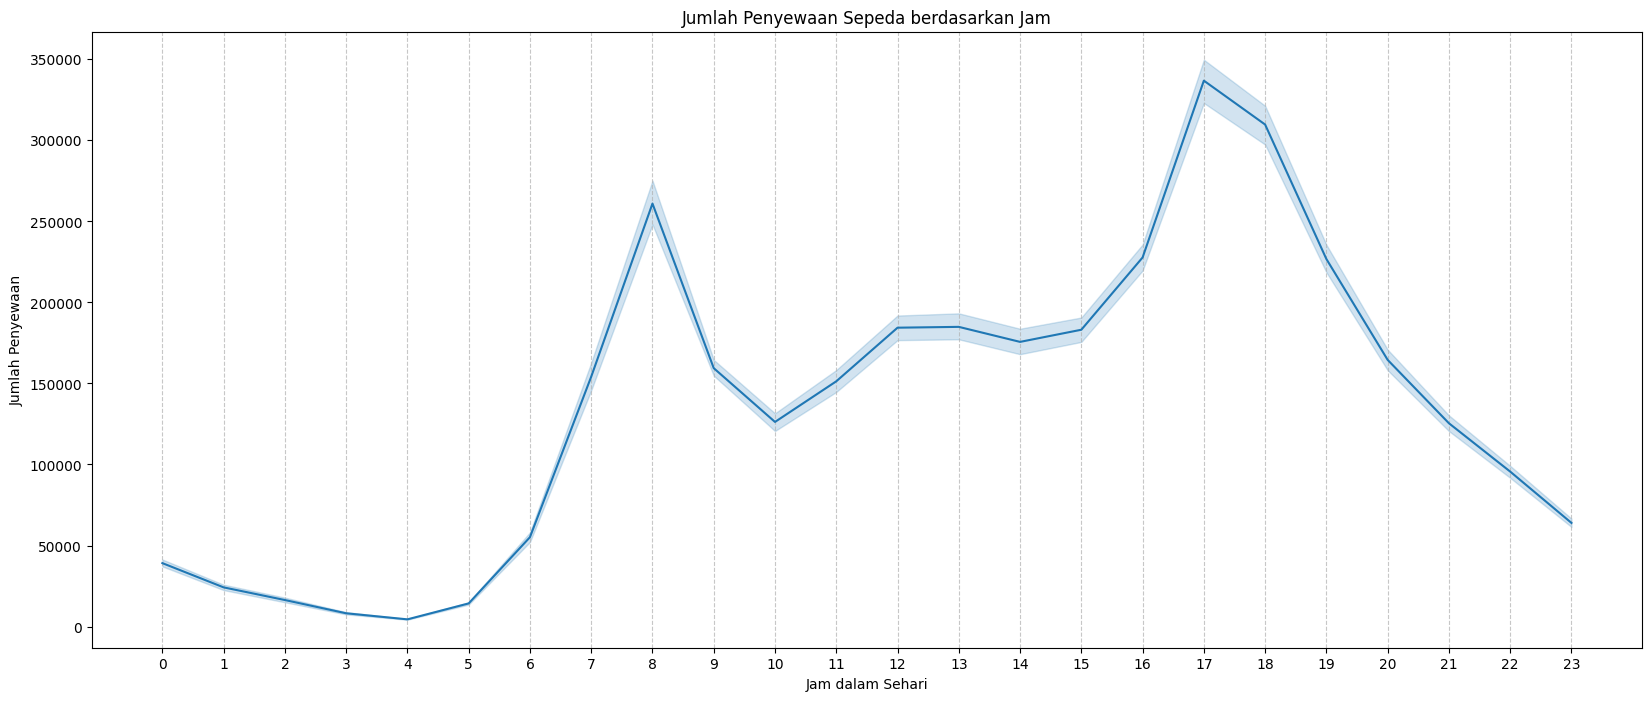

In [38]:
plt.figure(figsize=(20,8))
sns.lineplot(x="hr", y="cnt", data=df_hour, estimator="sum")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.title("Jumlah Penyewaan Sepeda berdasarkan Jam")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(range(24))
plt.show()


**Insight:**
- Dari visualisasi data diatas dapat diliihat beberapa hal yaitu orang lebih tertarik untuk menyewa sepeda di cuaca yang cukup cerah dibandingkan cuaca lainnya.
- Lalu orang juga kebih sering menggunakan jasa penyewaan sepeda pada saat weekend atau libur dibandingkan disaat hari kerja
- Setelah itu kita bisa lihat grafik diatas bahwa jam sibuk untuk penyewaan sepeda berada di pukul 17 sore dan juga pada 8 pagi

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1

  Kita bisa melihat grafik diatas menunjukkan bahwa jumlah penyewa dalam periode 2 tahun dari 2011-01-01 sampai 2012-12-31:
  1. cuaca cerah (clear) menarik lebih banyak penyewa, dengan jumlah 2.338.173 yang menunjukkan bahwa orang lebih memilih menyewa depeda saat cuaca mendukung.
  2.  Cuaca mist + cloudy mengalami penerunan jumlah penyewa dibandingkan saat cuaca cerah, dengan penyewa yaitu 795.952
  3. kondisi saat light snow / light rain mengalami jauh penurunan yang cukup signifikan dibandingkan dengan cuaca lainnya, dengan penyewa 158.331 saja.
  4. Dengan kondisi hujan deras hampir tidak ada yang meminjam sepeda pada periode tersebut yang hanya 223 penyewa saja.

  Secara keseluruhan, tren ini menunjukkan bahwa orang jauh lebih nyaman untuk menyewa sepeda saat cuaca cerah, sementara pada kondisi cuaca lainnya memiliki penurunan minat kepada para penyewanya.

  Dengan melihat data diatas kita bisa memaksimalkan layanan saat cuaca cerah, yang dimana jumlah penyewa jauh lebih banyak dibandingkan cuaca lainnya, dan juga kita bisa menawarkan beberapa promo untuk meningkatkan jumlah penyewa dengan, disaat cuaca cerah memberikan diskon untuk mendorong lebih banyak minat penyewa tanpa mengorbankan keuntungan, atau kebalikannya dengan memberikan diskon pada hari yang memiliki cuaca yang kurang mendukung untuk meningkatkan jumlah dari penyewa disaat kondisi tersebut.

  Untuk di kondisi cuaca berkabut dan juga hujan ringan kita bisa memberikan difasilitas pendukung untuk meningkatkan minat pengguna, dengan memberikan jas hujan atau perlengkapan gratis lainnya demi memberikan kenyamanan pengguna pada kondisi cuaca ini.

  Dan disaat hujan deras yang dimana jumlah penyewa jauh amat sangat turun bahkan tidak ada penyewa, kia bisa mempertimbangkan untuk mengurangi jumlah unit operasional dengan kondisi tersebut, demi mengurangi biaya operasional. serta alternatif lainnya adalah memanfaatkan kondisi ini untuk memastikan jumlah semua unit sepeda dalam kondisi prima untuk hari-hari sibuk berikutnya.
  



- Conclution pertanyaan 2

  Data visualisasi diatas menunjukkan adanya perbedaan jumlah penyewa atau minat para penyewa dalam kondisi musim-musim tertentu
  1. Musim gugur (fall) memiliki jumlah penyewa tertinggi yaitu 1.061.129, menunjukkan bahwa cuaca di musim ini lebih mendukung aktivitas untuk bersepeda dibandingkan musim lainnya.
  2. Musim panas(summer) memiliki jumlah penyewa yang juga tinggi dengan jumlah penyewa 918.589, meskipun sedikit lebih rendah dibandingkan musim gugur, kemungkinan karena suhu yang panas bisa mengurangi minat atau rasa nyaman kepada para pengguna atau penyewa sepeda.
  3. Musim dingin (winter) memiliki sedikit penurunan atau tren dalam jumlah penyewa sepeda dengan jumlah 841.613, yang kemungkinan dengan kondisi seperti ini suhu dingin mengurangi rasa nyaman dan juga kondisi jalan yang kurang mendukung untuk bersepeda dikarenakan jalanan cukup licin.
  4. Musim semi (springer) memiiliki jumlah penyewa terendah dibandingkan musim lainnya yaitu 471.348, yanng kemungkinan cuaca yang tidak cukup stabil serta curah hujun yang jauh  lebih tinggi membuat para pengguna kurang minat untuk menyewa sepeda dengan pertimbangan takut kehujanan disaat perjalanan.

  Dari data atau insight yang kita dapat dari visualisasi diatas bisa menerapkan beberapa strategi untuk meningkatan jumlah penyewaan yaitu seperti:
  1. fokus promosi di musim semi dan musim dingin dengan memberikan diskon atau program lainnya yang akhirnya membuat lebih banyak orang tertarik meskipun cuaca yang kurang mendukung.
  2. Memberikan layanan seperti penyewaan jas hujan atau sarung tangan pada saat musim dingin dan musim semi demi memberikan rasa nyaman kepada para pengguna.
  3. Menambahkan fitur pada sepeda seperti memberikan tempat botol minum atau minum gratis untuk membuat pengguna lebih nyaman bersepeda pada saat musim panas.
  4. Meningkatkan jumlah stok sepeda saat musim gugur dan musim panas, karena diprediksi pada musim tersebut memiliki peningkatanan permintaan.



- Conclution Pertanyaan 3
  Berdasarkan grafik jumlah penyewan sepeda kita bisa melihat bahwa:
  1. terdapat dua puncak jumlah penyewaan sepeda yaitu sekitar pukul 07:00 - 08:00 dan sore hari pada sekitar pukul 17:00 - 18:00. Hall ini menunjukkan bahwa sepeda banyak digunakan untuk keperluan komuter, seperti pergi dan pulang kerja atau sekolah
  2. ketika pukul 09:00 - 16:00, penyewaaan relatif jauh lebih stabil, yang kemungkinan besar karena orang - orang disaat jam tersebut lebih jarang beraktivitas di luar karena jam tersebut adalah jam disaat orang bekerja atau sekolah.
  3. setelah pukul 19:00, jumlah penyewaan mulai menurun, yang menunjukkan bahwa sepeda kurang diminati untuk aktivitas pada malam hari.
  4. Pada pukul 00:00 - 05:00 penyewaan turun drastis, dikarenakan jam tersebut kebanyakan orang tidak beraktivitas dan beristirahat.

  Dari data yang kita dapatkan ini, dapat disusun beberapa strategi untuk memberikan pelayanan terbaik kepada para pengguna, yaitu:
  1. Memperbanyak jumlah sepeda pada pukul 07:00 & 17:00 yang diharapkan pada saat jam sibuk tersebut dengan jumlah sepeda yang jauh lebih banyak, bisa menampung seluruh permintaan penyewaan.
  2. Menambahkan pencahayaan atau sistem keamanan pada malam hari, demi keamanan dan kenyaman pengguna, guna meningkatkan rasa aman bbagi para pengguna yang ingin menyewa sepeda di jam larut.
  3. Disaat jam-jam yang memiliki penurunan penyewaan kita bisa gunakan untuk menyiapkan sepeda-sepeda ini untuk hari berikutnya, yang memastikan bahwa sepeda dalam kondisi layak untuk digunakan pada hari berikutnya.

In [39]:
df_day.to_csv("dayCleaned.csv", index=False)


In [40]:
df_hour.to_csv("hourCleaned.csv", index=False)
